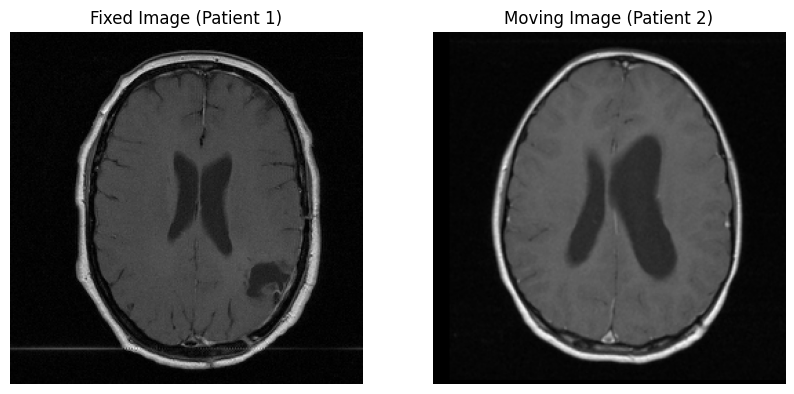

In [3]:
#! /usr/bin/env python
#
# Example script that shows how to preform the registration

from __future__ import print_function, absolute_import
import elastix
import matplotlib.pyplot as plt
import numpy as np
import imageio
import os
import SimpleITK as sitk
import warnings


warnings.filterwarnings("ignore", category=DeprecationWarning)

# IMPORTANT: these paths may differ on your system, depending on where
# Elastix has been installed. Please set accordingly.
ELASTIX_PATH = os.path.join(r'/Users/joostklis/Desktop/8DM20/elastix-5.0.0-mac/bin/elastix')
TRANSFORMIX_PATH = os.path.join(r'/Users/joostklis/Desktop/8DM20/elastix-5.0.0-mac/bin/transformix')

if not os.path.exists(ELASTIX_PATH):
    raise IOError('Elastix cannot be found, please set the correct ELASTIX_PATH.')
if not os.path.exists(TRANSFORMIX_PATH):
    raise IOError('Transformix cannot be found, please set the correct TRANSFORMIX_PATH.')

DATA_PATH = r'/Users/joostklis/Desktop/8DM20/ImagesforPractical'

# Define the paths to the two images
fixed_image_path = os.path.join(DATA_PATH, 'MR', 'patient1.jpg')

moving_image_path = os.path.join(DATA_PATH, 'MR','patient2.jpg')

# Load images
im_fixed = imageio.imread(fixed_image_path)
im_moving = imageio.imread(moving_image_path)

# Extract a single channel for visualization
im_fixed = im_fixed[:, :, 0]
im_moving = im_moving[:, :, 0]

# Plot images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(im_fixed, cmap='gray')
axes[0].set_title('Fixed Image (Patient 1)')
axes[0].axis('off')

axes[1].imshow(im_moving, cmap='gray')
axes[1].set_title('Moving Image (Patient 2)')
axes[1].axis('off')

plt.show()

# Sampling

In [ ]:
OUTPUT_DIR = r'/Users/joostklis/Desktop/8DM20/8DM20_Capita_Selecta/examples/results2'

# Define the paths to the two images
fixed_image_path = os.path.join(DATA_PATH, 'MR','patient1.jpg')
moving_image_path = os.path.join(DATA_PATH, 'MR','patient2.jpg')

# Make a results directory if non exists
if os.path.exists(OUTPUT_DIR) is False:
    os.mkdir(OUTPUT_DIR)

# Define a new elastix object 'el' with the correct path to elastix
el = elastix.ElastixInterface(elastix_path=ELASTIX_PATH)

# Execute the registration. Make sure the paths below are correct, and
# that the results folder exists from where you are running this script
el.register(
    fixed_image=fixed_image_path,
    moving_image=moving_image_path,
    parameters=[os.path.join(DATA_PATH, 'MR','parameters_samplespace_MR.txt')],
    output_dir=OUTPUT_DIR,
    )

# Find the results
transform_path = os.path.join(OUTPUT_DIR, 'TransformParameters.0.txt')
result_path = os.path.join(OUTPUT_DIR, 'result.0.tiff')

# Open the logfile into the dictionary log
for i in range(1):
    log_path = os.path.join(OUTPUT_DIR, 'IterationInfo.0.R{}.txt'.format(i))
    log = elastix.logfile(log_path)
    # Plot the 'metric' against the iteration number 'itnr'
    plt.plot(log['itnr'], log['metric'])
plt.legend(['Resolution {}'.format(i) for i in range(5)])

# Load the fixed, moving, and result images
fixed_image = imageio.imread(fixed_image_path)[:, :, 0]
moving_image = imageio.imread(moving_image_path)[:, :, 0]
transformed_moving_image = imageio.imread(result_path)

# Show the resulting image side by side with the fixed and moving image
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].imshow(fixed_image, cmap='gray')
ax[0].set_title('Fixed image')
ax[1].imshow(moving_image, cmap='gray')
ax[1].set_title('Moving image')
ax[2].imshow(transformed_moving_image, cmap='gray')
ax[2].set_title('Transformed\nmoving image')

# Make a new transformix object tr with the CORRECT PATH to transformix
tr = elastix.TransformixInterface(parameters=transform_path,
                                  transformix_path=TRANSFORMIX_PATH)

# Transform a new image with the transformation parameters
transformed_image_path = tr.transform_image(moving_image_path, output_dir=OUTPUT_DIR)

# Get the Jacobian matrix
jacobian_matrix_path = tr.jacobian_matrix(output_dir=OUTPUT_DIR)

# Get the Jacobian determinant
jacobian_determinant_path = tr.jacobian_determinant(output_dir=OUTPUT_DIR)

# Get the full deformation field
deformation_field_path = tr.deformation_field(output_dir=OUTPUT_DIR)

# Add a plot of the Jacobian determinant (in this case, the file is a tiff file)
ax[3].imshow(imageio.imread(jacobian_determinant_path.replace('dcm', 'tiff')))
ax[3].set_title('Jacobian\ndeterminant')

# Show the plots
[x.set_axis_off() for x in ax]
plt.show()



TypeError: ElastixInterface.register() got an unexpected keyword argument 'number_of_threads'

# B-spline grid spacing

In [12]:
OUTPUT_DIR = r'/Users/joostklis/Desktop/8DM20/results'

# Define the paths to the two images
fixed_image_path = os.path.join(DATA_PATH, 'MR','patient1.jpg')
moving_image_path = os.path.join(DATA_PATH, 'MR','patient2.jpg')

# Make a results directory if non exists
if os.path.exists(OUTPUT_DIR) is False:
    os.mkdir(OUTPUT_DIR)

# Define a new elastix object 'el' with the correct path to elastix
el = elastix.ElastixInterface(elastix_path=ELASTIX_PATH)

# Execute the registration. Make sure the paths below are correct, and
# that the results folder exists from where you are running this script
el.register(
    fixed_image=fixed_image_path,
    moving_image=moving_image_path,
    parameters=[os.path.join(DATA_PATH, 'MR','parameters_samplespace2_MR.txt')],
    output_dir=OUTPUT_DIR)

# Find the results
transform_path = os.path.join(OUTPUT_DIR, 'TransformParameters.0.txt')
result_path = os.path.join(OUTPUT_DIR, 'result.0.tiff')

# Open the logfile into the dictionary log
for i in range(5):
    log_path = os.path.join(OUTPUT_DIR, 'IterationInfo.0.R{}.txt'.format(i))
    log = elastix.logfile(log_path)
    # Plot the 'metric' against the iteration number 'itnr'
    plt.plot(log['itnr'], log['metric'])
plt.legend(['Resolution {}'.format(i) for i in range(5)])

# Load the fixed, moving, and result images
fixed_image = imageio.imread(fixed_image_path)[:, :, 0]
moving_image = imageio.imread(moving_image_path)[:, :, 0]
transformed_moving_image = imageio.imread(result_path)

# Show the resulting image side by side with the fixed and moving image
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].imshow(fixed_image, cmap='gray')
ax[0].set_title('Fixed image')
ax[1].imshow(moving_image, cmap='gray')
ax[1].set_title('Moving image')
ax[2].imshow(transformed_moving_image, cmap='gray')
ax[2].set_title('Transformed\nmoving image')

# Make a new transformix object tr with the CORRECT PATH to transformix
tr = elastix.TransformixInterface(parameters=transform_path,
                                  transformix_path=TRANSFORMIX_PATH)

# Transform a new image with the transformation parameters
transformed_image_path = tr.transform_image(moving_image_path, output_dir=OUTPUT_DIR)

# Get the Jacobian matrix
jacobian_matrix_path = tr.jacobian_matrix(output_dir=OUTPUT_DIR)

# Get the Jacobian determinant
jacobian_determinant_path = tr.jacobian_determinant(output_dir=OUTPUT_DIR)

# Get the full deformation field
deformation_field_path = tr.deformation_field(output_dir=OUTPUT_DIR)

# Add a plot of the Jacobian determinant (in this case, the file is a tiff file)
ax[3].imshow(imageio.imread(jacobian_determinant_path.replace('dcm', 'tiff')))
ax[3].set_title('Jacobian\ndeterminant')

# Show the plots
[x.set_axis_off() for x in ax]
plt.show()

/Users/joostklis/Desktop/8DM20/elastix-5.0.0-mac/bin/elastix -f /Users/joostklis/Desktop/8DM20/ImagesforPractical/MR/patient1.jpg -m /Users/joostklis/Desktop/8DM20/ImagesforPractical/MR/patient2.jpg -p /Users/joostklis/Desktop/8DM20/ImagesforPractical/MR/parameters_samplespace2_MR.txt -out /Users/joostklis/Desktop/8DM20/results


KeyboardInterrupt: 

# Jacobian

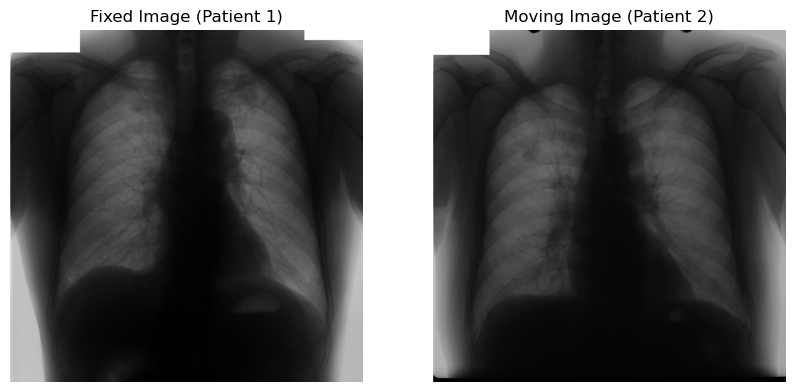

In [ ]:
ct_moving = sitk.ReadImage(os.path.join(DATA_PATH, r'chest_xrays\moving_image.mhd'));
ct_fixed = sitk.ReadImage(os.path.join(DATA_PATH, r'chest_xrays\fixed_image.mhd'));
ct_moving_array = sitk.GetArrayFromImage(ct_moving)
ct_fixed_array = sitk.GetArrayFromImage(ct_fixed)

# Plot images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(ct_fixed_array, cmap='gray')
axes[0].set_title('Fixed Image (Patient 1)')
axes[0].axis('off')

axes[1].imshow(ct_moving_array, cmap='gray')
axes[1].set_title('Moving Image (Patient 2)')
axes[1].axis('off')

plt.show()

D:\Elastix\elastix.exe -f D:\capita_selecta\ImagesforPractical\chest_xrays\fixed_image.mhd -m D:\capita_selecta\ImagesforPractical\chest_xrays\moving_image.mhd -p D:\capita_selecta\ImagesforPractical\chest_xrays\parameterswithpenalty.txt -out D:\capita_selecta\results_folder\results_jacob2


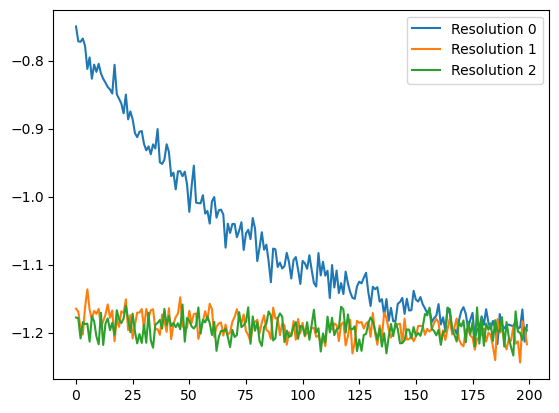

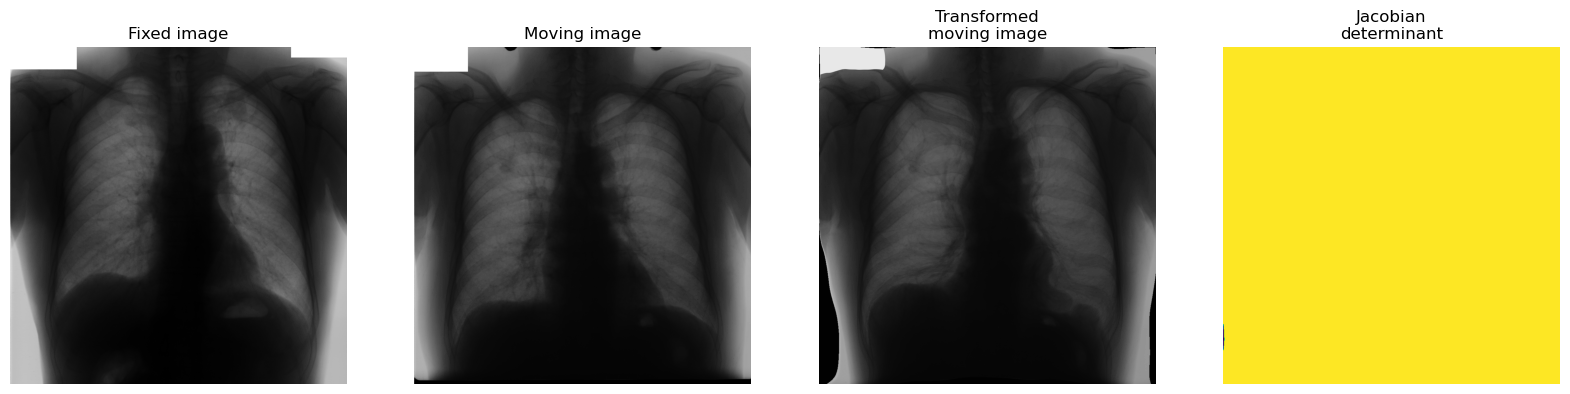

In [ ]:
OUTPUT_DIR = r'/Users/joostklis/Desktop/8DM20/results'

# # Define the paths to the two images
fixed_image_path = os.path.join(DATA_PATH, r'chest_xrays\fixed_image.mhd')
moving_image_path = os.path.join(DATA_PATH, r'chest_xrays\moving_image.mhd')

# Make a results directory if non exists
if os.path.exists(OUTPUT_DIR) is False:
    os.mkdir(OUTPUT_DIR)

# Define a new elastix object 'el' with the correct path to elastix
el = elastix.ElastixInterface(elastix_path=ELASTIX_PATH)

# Execute the registration. Make sure the paths below are correct, and
# that the results folder exists from where you are running this script
el.register(
    fixed_image=fixed_image_path,
    moving_image=moving_image_path,
    parameters=[os.path.join(DATA_PATH, 'chest_xrays\parameterswithpenalty.txt')],
    output_dir=OUTPUT_DIR)

# Find the results
transform_path = os.path.join(OUTPUT_DIR, 'TransformParameters.0.txt')
result_path = os.path.join(OUTPUT_DIR, 'result.0.mhd')

# Open the logfile into the dictionary log
for i in range(3):
    log_path = os.path.join(OUTPUT_DIR, 'IterationInfo.0.R{}.txt'.format(i))
    log = elastix.logfile(log_path)
    # Plot the 'metric' against the iteration number 'itnr'
    plt.plot(log['itnr'], log['metric'])
plt.legend(['Resolution {}'.format(i) for i in range(5)])

# Load the fixed, moving, and result images
fixed_image = imageio.imread(fixed_image_path)
moving_image = imageio.imread(moving_image_path)
transformed_moving_image = imageio.imread(result_path)

# Show the resulting image side by side with the fixed and moving image
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].imshow(fixed_image, cmap='gray')
ax[0].set_title('Fixed image')
ax[1].imshow(moving_image, cmap='gray')
ax[1].set_title('Moving image')
ax[2].imshow(transformed_moving_image, cmap='gray')
ax[2].set_title('Transformed\nmoving image')

# Make a new transformix object tr with the CORRECT PATH to transformix
tr = elastix.TransformixInterface(parameters=transform_path,
                                  transformix_path=TRANSFORMIX_PATH)

# Transform a new image with the transformation parameters
transformed_image_path = tr.transform_image(moving_image_path, output_dir=OUTPUT_DIR)

# Get the Jacobian matrix
jacobian_matrix_path = tr.jacobian_matrix(output_dir=OUTPUT_DIR)

# Get the Jacobian determinant
jacobian_determinant_path = tr.jacobian_determinant(output_dir=OUTPUT_DIR)

# Get the full deformation field
deformation_field_path = tr.deformation_field(output_dir=OUTPUT_DIR)

# Add a plot of the Jacobian determinant (in this case, the file is a tiff file)
ax[3].imshow(imageio.imread(jacobian_determinant_path.replace('dcm', 'tiff')) > 0)
ax[3].set_title('Jacobian\ndeterminant')

# Show the plots
[x.set_axis_off() for x in ax]
plt.show()

# Full demo

D:\Elastix\elastix.exe -f D:\capita_selecta\ImagesforPractical\MR\patient1.jpg -m D:\capita_selecta\ImagesforPractical\MR\patient2.jpg -p D:\capita_selecta\ImagesforPractical\MR\parameters_bspline_multires_MR.txt -out D:\capita_selecta\results


C:\Users\20203226\AppData\Local\Temp\ipykernel_1792\61908017.py:59: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  fixed_image = imageio.imread(fixed_image_path)[:, :, 0]
C:\Users\20203226\AppData\Local\Temp\ipykernel_1792\61908017.py:60: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  moving_image = imageio.imread(moving_image_path)[:, :, 0]
C:\Users\20203226\AppData\Local\Temp\ipykernel_1792\61908017.py:61: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use 

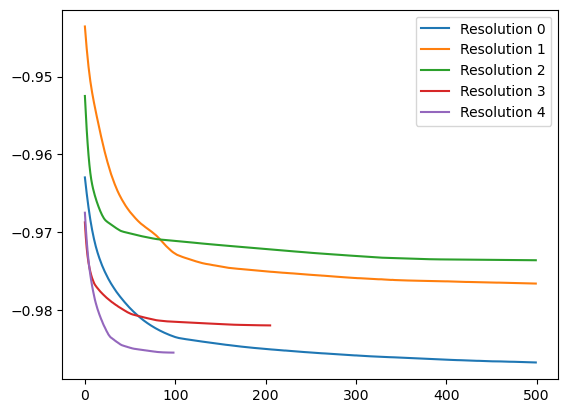

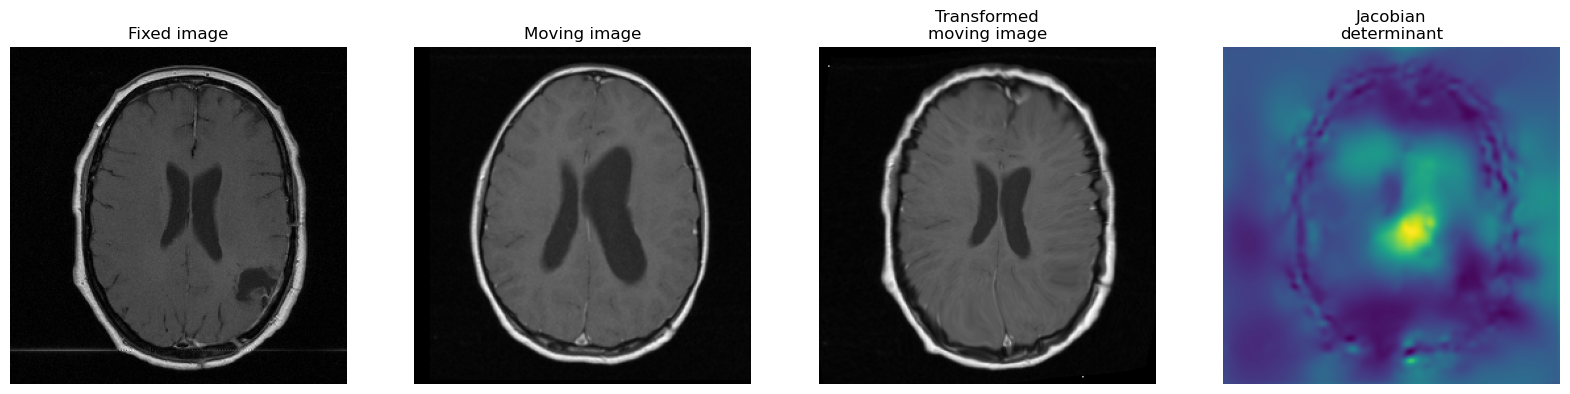

In [ ]:
OUTPUT_DIR = r'/Users/joostklis/Desktop/8DM20/results'

# Make a results directory if non exists
if os.path.exists(OUTPUT_DIR) is False:
    os.mkdir(OUTPUT_DIR)

# Define a new elastix object 'el' with the correct path to elastix
el = elastix.ElastixInterface(elastix_path=ELASTIX_PATH)

# Execute the registration. Make sure the paths below are correct, and
# that the results folder exists from where you are running this script
el.register(
    fixed_image=fixed_image_path,
    moving_image=moving_image_path,
    parameters=[os.path.join(DATA_PATH, 'MR\parameters_bspline_multires_MR.txt')],
    output_dir=OUTPUT_DIR)

# Find the results
transform_path = os.path.join(OUTPUT_DIR, 'TransformParameters.0.txt')
result_path = os.path.join(OUTPUT_DIR, 'result.0.tiff')

# Open the logfile into the dictionary log
for i in range(5):
    log_path = os.path.join(OUTPUT_DIR, 'IterationInfo.0.R{}.txt'.format(i))
    log = elastix.logfile(log_path)
    # Plot the 'metric' against the iteration number 'itnr'
    plt.plot(log['itnr'], log['metric'])
plt.legend(['Resolution {}'.format(i) for i in range(5)])

# Load the fixed, moving, and result images
fixed_image = imageio.imread(fixed_image_path)[:, :, 0]
moving_image = imageio.imread(moving_image_path)[:, :, 0]
transformed_moving_image = imageio.imread(result_path)

# Show the resulting image side by side with the fixed and moving image
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].imshow(fixed_image, cmap='gray')
ax[0].set_title('Fixed image')
ax[1].imshow(moving_image, cmap='gray')
ax[1].set_title('Moving image')
ax[2].imshow(transformed_moving_image, cmap='gray')
ax[2].set_title('Transformed\nmoving image')

# Make a new transformix object tr with the CORRECT PATH to transformix
tr = elastix.TransformixInterface(parameters=transform_path,
                                  transformix_path=TRANSFORMIX_PATH)

# Transform a new image with the transformation parameters
transformed_image_path = tr.transform_image(moving_image_path, output_dir=OUTPUT_DIR)

# Get the Jacobian matrix
jacobian_matrix_path = tr.jacobian_matrix(output_dir=OUTPUT_DIR)

# Get the Jacobian determinant
jacobian_determinant_path = tr.jacobian_determinant(output_dir=OUTPUT_DIR)

# Get the full deformation field
deformation_field_path = tr.deformation_field(output_dir=OUTPUT_DIR)

# Add a plot of the Jacobian determinant (in this case, the file is a tiff file)
ax[3].imshow(imageio.imread(jacobian_determinant_path.replace('dcm', 'tiff')))
ax[3].set_title('Jacobian\ndeterminant')

# Show the plots
[x.set_axis_off() for x in ax]
plt.show()